In [ ]:
!pip install tslearn
!pip install efficiency

In [ ]:
import pickle
import numpy as np
import tslearn
with open('years.pkl', 'rb') as y, open("cites.pkl", 'rb') as c:
  y = pickle.load(y)
  X = pickle.load(c)
  # y = y[0:1000]
  # X = X[0:1000]
maxLength = max(len(x) for x in X)
print(maxLength)
processed_y = []
processed_x = []
for i in range(len(y)):
  interpolated_y = np.linspace(y[i][0], y[i][-1], maxLength)
  processed_y.append(interpolated_y)
  interpolated_x = []
  for each in interpolated_y:
    interpolated_x.append(np.interp(each, y[i], X[i]))
  processed_x.append(interpolated_x)

40


In [9]:
import json
with open("cluster_data.jsonl") as f:
  ids = [json.loads(line) for line in f if line.strip()]
  # scholars = scholars[0:10000]

In [10]:
print(len(ids))

68128


In [ ]:
processed_x = [each/np.mean(each) for each in processed_x]

In [ ]:
import tslearn
from tslearn.clustering import TimeSeriesKMeans

In [ ]:
with open('names.pkl', 'rb') as n:
  names = pickle.load(n)
  names = names[0:10000]

In [ ]:
# import random
# random.seed(42)
# from efficiency.function import set_seed
# set_seed(0)

input = tslearn.utils.to_time_series_dataset(processed_x)
model = TimeSeriesKMeans(n_clusters=9, metric='dtw',max_iter=20,random_state=8)
model.fit(input)
model.labels_

array([6, 1, 3, ..., 0, 3, 3])

In [ ]:
import pickle
with open('model_label.pkl', 'wb') as f:
  pickle.dump(model.labels_, f)

In [ ]:
y = list(range(0,40,1))
len(y)

40

In [ ]:
import matplotlib.pyplot as plt
cluster = []
# new_x = []
for i in range(len(processed_x)):
  if (model.labels_[i] == 0):
    cluster.append(processed_x[i])
print(np.max(cluster))
print(len(cluster))
cluster = cluster / np.max(cluster)
# temp

7.236580516898608
6456


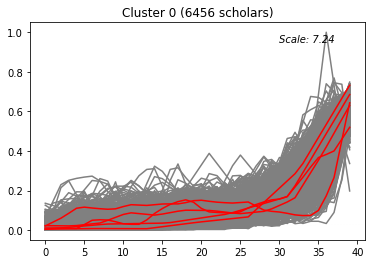

In [ ]:
import matplotlib.pyplot as plt
# Creating figure
fig = plt.figure()
 
# Adding axes on the figure
ax = fig.add_subplot(111)
 
# Plotting data on the axes
# ax.plot(x, y)
idx = [53, 73, 27, 23, 45]
# idx = [1,2,3,4,0]
for i in range(len(cluster)):

  if i not in idx:
    ax.plot(y, cluster[i], color='gray')
for i in idx:
  ax.plot(y, cluster[i], color='red')
# for i in temp:
#   plt.plot(y, processed_x[i], color='red')
# # plt.ylim([0,20])
ax.set_title("Cluster 0 (6456 scholars)")
ax.text(30, 0.95, 'Scale: 7.24', style='italic')
plt.show()
fig.savefig('cluster0.pdf')

In [6]:
import json
import pickle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
with open('model_label.pkl', 'rb') as y:
  model = pickle.load(y)

In [8]:
len(model)

68128

In [51]:
cluster2 = []
for i in range(len(model)):
  if model[i] == 4:
    cluster2.append(ids[i]["url"].split("&user=")[-1])

In [52]:
scholar_2 = [scholar for scholar in scholars if scholar["gs_sid"] in cluster2]

In [53]:
print(len(scholar_2))

1565


In [55]:
import numpy as np
female = 0
male = 0
dropout = 0
citation = []
h_index = []
academic_age = []
for each in scholar_2:
  # if each["gender"] == 'F':
  #   female += 1

    citation.append(int(each["citation_table"][0]))
    h_index.append(int(each["citation_table"][1]))
    academic_age.append(each["academic_age"])
    if each["academic_age"] - each["academic_lifespan"] > 2:
      dropout += 1
# print(female/(female + male))
# print(female/len(scholar_2))
print(np.mean(citation))
print(np.mean(h_index))
print(np.mean(academic_age))
print(dropout/len(scholar_2))
# print(dropout / female)

787.8006389776358
9.858785942492013
22.16996805111821
0.5987220447284345


In [ ]:
scholars[0]

{'academic': False,
 'academic_age': 31,
 'academic_lifespan': 28,
 'cit_sum_before_year': {'1994': 39,
  '1995': 86,
  '1996': 187,
  '1997': 287,
  '1998': 383,
  '1999': 500,
  '2000': 615,
  '2001': 727,
  '2002': 833,
  '2003': 951,
  '2004': 1070,
  '2005': 1203,
  '2006': 1357,
  '2007': 1543,
  '2008': 1719,
  '2009': 1866,
  '2010': 2005,
  '2011': 2129,
  '2012': 2323,
  '2013': 2487,
  '2014': 2615,
  '2015': 2758,
  '2016': 2935,
  '2017': 3051,
  '2018': 3167,
  '2019': 3261,
  '2020': 3335,
  '2021': 3411,
  '2022': 3435},
 'citation_table': ['3539', '27'],
 'domain_labels': ['logic_programming',
  'machine_learning',
  'natural_language_processing'],
 'gender': 'F',
 'gs_sid': 'IIrX5SMAAAAJ',
 'organization': 'N/A',
 'organization_code': None,
 'paper_num': 151}

In [ ]:
# Dropout rate of female and non-female in each cluster
female_count = 0
total_count = 0
female_citation = 0
total_citation = 0
male_citation = 0
male_count = 0
dropout = 0
female_dropout = 0
male_dropout = 0
for i in range(len(processed_x)):
  if model.labels_[i] == 3 or model.labels_[i] == 5 or model.labels_[i] == 8:
    # total_citation += int(scholars[i]['citation_table'][0])
    total_count += 1
    if scholars[i]["academic_age"] - scholars[i]["academic_lifespan"] > 2:
      dropout += 1
    if scholars[i]["gender"] == 'F':
      # female_citation += int(scholars[i]['citation_table'][0])
      female_count += 1
      if scholars[i]["academic_age"] - scholars[i]["academic_lifespan"] > 2:
        female_dropout += 1
    elif scholars[i]["gender"] == 'M':
      # male_citation += int(scholars[i]['citation_table'][0])
      male_count += 1
      if scholars[i]["academic_age"] - scholars[i]["academic_lifespan"] > 2:
        male_dropout += 1
print(female_dropout / female_count)
print(dropout / total_count)
print((female_dropout / female_count) / ((female_dropout + male_dropout) / (female_count + male_count)))

0.0989556135770235
0.08830159719890643
1.063329683299997


In [ ]:
# Average citation of female and non-female in each cluster
female_count = 0
total_count = 0
female_citation = 0
total_citation = 0
male_citation = 0
male_count = 0
for i in range(len(processed_x)):
  if model.labels_[i] == 4:
    total_citation += int(scholars[i]['citation_table'][0])
    total_count += 1
    if scholars[i]["gender"] == 'F':
      female_citation += int(scholars[i]['citation_table'][0])
      female_count += 1
    elif scholars[i]["gender"] == 'M':
      male_citation += int(scholars[i]['citation_table'][0])
      male_count += 1
print(total_citation / total_count)
print(female_citation / female_count)
print((female_citation / female_count) / ((female_citation + male_citation) / (female_count + male_count)))

787.8006389776358
438.14503816793894
0.5708214974721154


In [ ]:
# Average academic_age of female and non-female in each cluster
female_count = 0
total_count = 0
female_index = 0
total_index = 0
male_index = 0
male_count = 0
for i in range(len(processed_x)):
  if model.labels_[i] == 4:
    total_index += int(scholars[i]['academic_age'])
    total_count += 1
    if scholars[i]["gender"] == 'F':
      female_index += int(scholars[i]['academic_age'])
      female_count += 1
    elif scholars[i]["gender"] == 'M':
      male_index += int(scholars[i]['academic_age'])
      male_count += 1
print(female_index / female_count)
print(total_index / total_count)
print((female_index / female_count) / ((female_index + male_index) / (female_count + male_count)))

19.923664122137403
21.945047923322683
0.8778880472385755


In [ ]:
# check exponential increase scholars
import pandas as pd
exponential_scholar = []
for i in range(len(processed_x)):
  if model.labels_[i] == 0 or model.labels_[i] == 2:
    exponential_scholar.append(scholars[i])

exponential_df = pd.DataFrame(exponential_scholar)

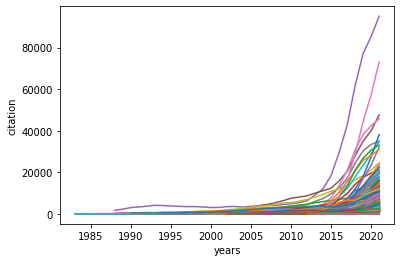

In [ ]:
cite_trend = []
year_trend = []
for i in range(len(processed_x)):
  if model.labels_[i] == 0 or model.labels_[i] == 2:
    cite_trend.append(X[i])
    year_trend.append(y[i])
# Creating figure
fig = plt.figure()
 
# Adding axes on the figure
ax = fig.add_subplot(111)

# Plotting data on the axes
# ax.plot(x, y)
idx = [53, 73, 27, 23, 45]
# idx = [1,2,3,4,0]
for i in range(len(cite_trend)):

  # if i not in idx:
  ax.plot(year_trend[i], cite_trend[i])
# for i in idx:
#   ax.plot(y, cluster[i], color='red')
# ax.set_title("Cluster 0 (6456 scholars)")
# ax.text(30, 0.95, 'Scale: 7.24', style='italic')
plt.xlabel("years")
plt.ylabel("citation")
plt.show()
# fig.savefig('cluster0.pdf')

In [ ]:
# Average h-index of female and non-female in each cluster
female_count = 0
total_count = 0
female_index = 0
total_index = 0
male_index = 0
male_count = 0
for i in range(len(processed_x)):
  if model.labels_[i] == 3 or model.labels_[i] == 5 or model.labels_[i] == 8:
    total_index += int(scholars[i]['citation_table'][1])
    total_count += 1
    if scholars[i]["gender"] == 'F':
      female_index += int(scholars[i]['citation_table'][1])
      female_count += 1
    elif scholars[i]["gender"] == 'M':
      male_index += int(scholars[i]['citation_table'][1])
      male_count += 1
print(female_index / female_count)
print(total_index / total_count)
print((female_index / female_count) / ((female_index + male_index) / (female_count + male_count)))

In [ ]:
average_cites = [sum(sub_list) / len(sub_list) for sub_list in zip(*processed_x)]

In [ ]:
import math
temp = []
for each in processed_x:
  subtracted_array = np.subtract(each, average_cites)
  subtracted = list(subtracted_array)
  squared = [i**2 for i in subtracted]
  temp.append(squared)
arr = np.array(temp)
total = sum(arr, 0).tolist()
std_cites = [math.sqrt(i / 10000) for i in total] 

In [ ]:
normalized_cites = []
for each in processed_x:
  subtracted_array = np.subtract(each, average_cites)
  subtracted = list(subtracted_array)
  res = [i / j for i, j in zip(subtracted, std_cites)]
  normalized_cites.append(res)

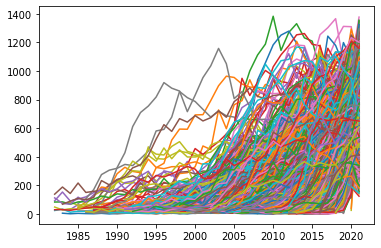

In [ ]:
import matplotlib.pyplot as plt
with open('years.pkl', 'rb') as y, open("cites.pkl", 'rb') as c:
  y = pickle.load(y)
  X = pickle.load(c)
  y = y[0:10000]
  X = X[0:10000]
for i in range(len(y)):
  if (model.labels_[i] == 5):
    plt.plot(y[i], X[i])
  # print(X[i])
  # print(y[i])
  # break
plt.show()